In [1]:
import sympy as sp

print(f"Sympy Version: {sp.__version__}")

# 数式をキレイに表示する
sp.init_printing()

Sympy Version: 1.8


### 極限を計算する

- 極限は `sympy.limit()`を使用することで計算できる。
- 無限は、`sympy.oo`で扱うことが出来る

In [2]:
x, y, z = sp.symbols('x y z')
x, y, z

In [3]:
exp = sp.sin(x) / x
exp

In [4]:
sp.limit(exp, x, 0)

In [5]:
sp.limit(exp, x, sp.oo)

### 微分を計算する

- 微分は, `sympy.diff()`で計算できる。
- また、`sympy.Derivative`で微分を定義することもできる。
  + 微分を実行する際は、`sympy.Derivative.doit()`を使う

In [6]:
exp = x ** 2 * sp.sin(x)
exp

In [7]:
sp.diff(exp, x)

In [8]:
# 2階微分
sp.diff(exp, x, 2)

In [9]:
exp = sp.sin(x) * sp.cos(y)
exp

In [10]:
# xで偏微分
sp.diff(exp, x)

In [11]:
# yで偏微分
sp.diff(exp, y)

In [12]:
# xで偏微分 → yで偏微分
sp.diff(exp, x, y)

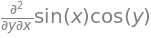

In [13]:
deriv = sp.Derivative(sp.sin(x) * sp.cos(y), x, y)
deriv

In [14]:
deriv.doit()

In [15]:
# 微分後の式に値を代入
deriv.doit().subs({x: 0, y: sp.pi / 2.0})

### テーラー展開を実行する

- `sympy.series()`でテーラー展開することができる。
- 数式のオブジェクトに対して、'数式.series()'を呼び出すことでも、テーラー展開できる。

In [16]:
sp.series(sp.log(x + 1), x)

In [17]:
# 数式オブジェクトに対してもテーラー展開できる
sp.log(x + 1).series(x)

In [18]:
# テーラー展開の次数も指定可能
sp.series(sp.log(x + 1), x, 0, 3)

### 積分を実行する

- 積分は、`sympy.integrate()`で実行できる。
  + 積分範囲積分範囲を指定しない場合は、不定積分として扱われる。
  + 積分範囲ありの場合は、定積分となる。
- `sympy.Integral`を使用することで、積分を定義することができる。
  + 積分の実行は、`sympy.Integral.doit()`で行うことができる。

In [19]:
exp = x ** 2 + 2 * x - 3
exp

In [20]:
# 不定積分
sp.integrate(exp, x)

In [21]:
# 定積分
sp.integrate(exp, (x, 0, 1))

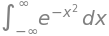

In [22]:
exp = sp.exp(-x ** 2)

# 積分の定義 (この段階では積分は実行されない)
integ = sp.Integral(exp, (x, -sp.oo, sp.oo))
integ

In [23]:
integ.doit()

### 微分方程式を解く

- 微分方程式のために、`sympy.Function`で関数を定義する必要がある。
- `sympy.dsolve()`で微分方程式を解くことが出来る。

In [24]:
x = sp.Symbol('x')
f = sp.Function('f')
f(x)

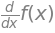

In [25]:
# 微分の定義
fx = sp.diff(f(x), x)
fx

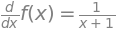

In [26]:
# 微分方程式の作成
equation = sp.Eq(fx, 1 / (1 + x))
equation

In [27]:
sp.dsolve(equation)

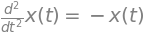

In [28]:
# 2階の微分方程式
t = sp.Symbol('t')
x = sp.Function('x')
lhs = sp.diff(x(t), t, 2)
rhs = -1 * x(t)

equation = sp.Eq(lhs, rhs)
equation

In [29]:
ans = sp.dsolve(equation)
ans

In [30]:
# 積分定数に値を代入する
C1, C2 = sp.symbols('C1 C2')
ans.subs({C1: 2.0})